# Plotting orbits of two objects using numerical methods

## Konstantinos Doran SN:22007700 Date:11/02/24

Introduction:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def force(r1,r2,m1,m2):
    """Returns the gravitational force on a mass, m1, at a point r1, due to another mass, m2, at a point r2.
    
    Inputs:
    r1      position of first mass as a numpy array
    r2      position of second mass as a numpy array
    m1      mass of first object
    m2      mass of second object    
    Returns:
    f_on_m1 force on mass 1 as a numpy array
    """
    # Find r_12 and its magnitude
    r12 = r2 - r1
    f_on_m1 = G*m1*m2/(np.sqrt((np.dot(r12,r12))**3))*r12
    return f_on_m1

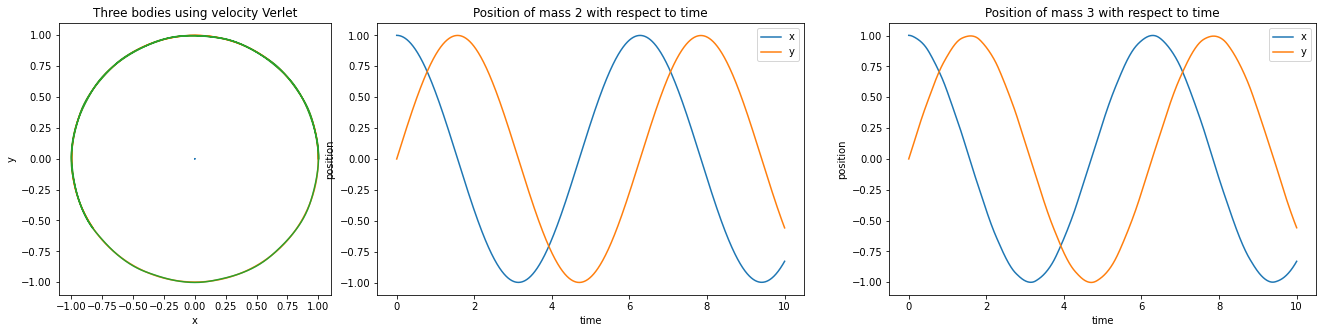

In [3]:
# Set up number of steps, masses, timestep again (use new variable names)
G = 1        # Appropriate units
Ndim = 2     #2D problem for now
Nsteps_verlet = 100000
dt_verlet = 0.0001
m1_verlet = 1.0
m2_verlet = 3e-6
m3_verlet = 3e-8
r12 = 1
r23 = 0.0025
v2 = np.sqrt(G*m1_verlet*(r12-(m2_verlet*r12/(m1_verlet+m2_verlet))))/r12
v3 = v2- np.sqrt((G*m2_verlet*(r23-(m3_verlet*r23/(m2_verlet+m3_verlet)))))/r23
# Storage for positions, velocities etc (again, use new names)
r1_verlet = np.zeros((Nsteps_verlet,Ndim))
r2_verlet = np.zeros((Nsteps_verlet,Ndim))
r3_verlet = np.zeros((Nsteps_verlet,Ndim))
v1_verlet = np.zeros((Nsteps_verlet,Ndim))
v2_verlet = np.zeros((Nsteps_verlet,Ndim))
v3_verlet = np.zeros((Nsteps_verlet,Ndim))
# Set up storage for energies
u1_verlet = np.zeros((Nsteps_verlet))
u2_verlet = np.zeros((Nsteps_verlet))
u3_verlet = np.zeros((Nsteps_verlet))
k1_verlet = np.zeros((Nsteps_verlet))
k2_verlet = np.zeros((Nsteps_verlet))
k3_verlet = np.zeros((Nsteps_verlet))
totalE1_verlet = np.zeros((Nsteps_verlet))
totalE2_verlet = np.zeros((Nsteps_verlet))
totalE3_verlet = np.zeros((Nsteps_verlet))
# Initial conditions
r1_verlet[0,:] = np.array((0,0))
r2_verlet[0,:] = np.array((r12,0))
r3_verlet[0,:] = np.array((r12+r23,0))
v1_verlet[0,:] = np.array((0,0))
v2_verlet[0,:] = np.array((0,v2))
v3_verlet[0,:] = np.array((0,v3))
r12_verlet = r2_verlet[0,:] - r1_verlet[0,:]
r23_verlet = r3_verlet[0,:] - r2_verlet[0,:]
r13_verlet = r3_verlet[0,:] - r1_verlet[0,:]
u1_verlet[0] = -G*m1_verlet*(m2_verlet/np.linalg.norm(r12_verlet) + m3_verlet/np.linalg.norm(r13_verlet))
u2_verlet[0] = -G*m2_verlet*(m1_verlet/np.linalg.norm(r12_verlet) + m3_verlet/np.linalg.norm(r23_verlet))
u3_verlet[0] = -G*m3_verlet*(m1_verlet/np.linalg.norm(r13_verlet) + m2_verlet/np.linalg.norm(r23_verlet))
k1_verlet[0] = 0.5*m1_verlet*(np.dot(v1_verlet[0,:], v1_verlet[0,:]))
k2_verlet[0] = 0.5*m2_verlet*(np.dot(v2_verlet[0,:],v2_verlet[0,:]))
k3_verlet[0] = 0.5*m2_verlet*(np.dot(v3_verlet[0,:],v3_verlet[0,:]))
totalE1_verlet[0] = u1_verlet[0]+k1_verlet[0]
totalE2_verlet[0] = u2_verlet[0]+k2_verlet[0]
totalE3_verlet[0] = u3_verlet[0]+k3_verlet[0]

for i in range(Nsteps_verlet-1):
    # Find forces on masses at this timestep
    f1 = force(r1_verlet[i,:],r2_verlet[i,:],m1_verlet,m2_verlet) + force(r1_verlet[i,:],r3_verlet[i,:],m1_verlet,m3_verlet)
    f2 = force(r2_verlet[i,:],r1_verlet[i,:],m2_verlet,m1_verlet) + force(r2_verlet[i,:],r3_verlet[i,:],m2_verlet,m3_verlet)
    f3 = force(r3_verlet[i,:],r1_verlet[i,:],m3_verlet,m1_verlet) + force(r3_verlet[i,:],r2_verlet[i,:],m3_verlet,m2_verlet)
    # Update positions using velocity Verlet
    r1_verlet[i+1,:] = r1_verlet[i,:] + dt_verlet*v1_verlet[i,:] + (dt_verlet**2)*f1/(2*m1_verlet)
    r2_verlet[i+1,:] = r2_verlet[i,:] + dt_verlet*v2_verlet[i,:] + (dt_verlet**2)*f2/(2*m2_verlet)
    r3_verlet[i+1,:] = r3_verlet[i,:] + dt_verlet*v3_verlet[i,:] + (dt_verlet**2)*f2/(2*m3_verlet)
    # Find forces at new timestep (remember that you have to store previous forces)
    f1new = force(r1_verlet[i+1,:],r2_verlet[i+1,:],m1_verlet,m2_verlet) + force(r1_verlet[i+1,:],r3_verlet[i+1,:],m1_verlet,m3_verlet)
    f2new = force(r2_verlet[i+1,:],r1_verlet[i+1,:],m2_verlet,m1_verlet) + force(r2_verlet[i+1,:],r3_verlet[i+1,:],m2_verlet,m3_verlet)
    f3new = force(r3_verlet[i+1,:],r2_verlet[i+1,:],m3_verlet,m2_verlet) + force(r3_verlet[i+1,:],r1_verlet[i+1,:],m3_verlet,m1_verlet)
    v1_verlet[i+1,:] = v1_verlet[i,:] + dt_verlet*(f2 + f2new)/(2*m1_verlet)
    v2_verlet[i+1,:] = v2_verlet[i,:] + dt_verlet*(f2 + f2new)/(2*m2_verlet)
    v3_verlet[i+1,:] = v3_verlet[i,:] + dt_verlet*(f3 + f3new)/(2*m3_verlet)
    # Store energies
    r12_verlet = r2_verlet[i+1,:] - r1_verlet[i+1,:]
    r23_verlet = r3_verlet[i+1,:] - r2_verlet[i+1,:]
    r13_verlet = r3_verlet[i+1,:] - r1_verlet[i+1,:]
    u1_verlet[i+1] = -G*m1_verlet*(m2_verlet/np.linalg.norm(r12_verlet) + m3_verlet/np.linalg.norm(r13_verlet))
    u2_verlet[i+1] = -G*m2_verlet*(m1_verlet/np.linalg.norm(r12_verlet) + m3_verlet/np.linalg.norm(r23_verlet))
    u3_verlet[i+1] = -G*m3_verlet*(m1_verlet/np.linalg.norm(r13_verlet) + m2_verlet/np.linalg.norm(r23_verlet))
    k1_verlet[i+1] = 0.5*m1_verlet*(np.dot(v1_verlet[i+1,:],v1_verlet[i+1,:]))
    k2_verlet[i+1] = 0.5*m2_verlet*(np.dot(v2_verlet[i+1,:],v2_verlet[i+1,:]))
    k2_verlet[i+1] = 0.5*m3_verlet*(np.dot(v3_verlet[i+1,:],v3_verlet[i+1,:]))
    totalE1_verlet[i+1] = u1_verlet[i+1]+k1_verlet[i+1]
    totalE2_verlet[i+1] = u2_verlet[i+1]+k2_verlet[i+1]
    totalE3_verlet[i+1] = u3_verlet[i+1]+k3_verlet[i+1]

# Plot orbit, energies, angular momentum again
t_arr = np.linspace(0,Nsteps_verlet*dt_verlet,Nsteps_verlet)
fig3 = plt.figure(figsize=(26,5))
ax1 = fig3.add_subplot(1,2,1)
ax1.plot(r1_verlet[:,0],r1_verlet[:,1])
ax1.plot(r2_verlet[:,0],r2_verlet[:,1])
ax1.plot(r3_verlet[:,0],r3_verlet[:,1])
ax1.axis('scaled')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Three bodies using velocity Verlet")
ax2 = fig3.add_subplot(1,3,2)
ax2.plot(t_arr,r2_verlet[:,0], label="x")
ax2.plot(t_arr,r2_verlet[:,1], label="y")
ax2.set_xlabel("time")
ax2.set_ylabel("position")
ax2.set_title("Position of mass 2 with respect to time")
ax2.legend()
ax3 = fig3.add_subplot(1,3,3)
ax3.plot(t_arr,r3_verlet[:,0], label="x")
ax3.plot(t_arr,r3_verlet[:,1], label="y")
ax3.set_xlabel("time")
ax3.set_ylabel("position")
ax3.set_title("Position of mass 3 with respect to time")
ax3.legend()    

Had an issue with stability of moon orbit however, after adjusting my time step this was resolved. Look at critical timestep for verlet method. Decreasing size of time step increased calculation time considerably though.

Text(0.5, 1.0, 'Total Energy against time using velocity Verlet')

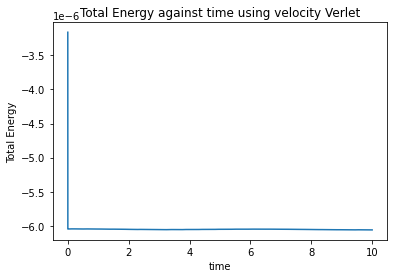

In [4]:
totalE_verlet = totalE1_verlet+totalE2_verlet + totalE3_verlet
plt.plot(t_arr, totalE_verlet)
plt.xlabel("time")
plt.ylabel("Total Energy")
plt.title("Total Energy against time using velocity Verlet")

Text(0.5, 1.0, 'Total Angular momentum using velocity Verlet')

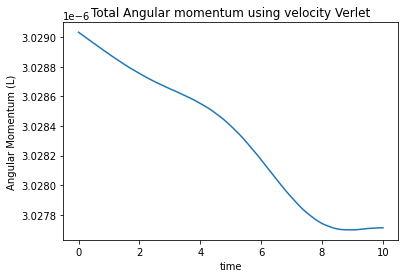

In [5]:
L1verlet = np.cross(r1_verlet, v1_verlet)*m1_verlet
L2verlet = np.cross(r2_verlet, v2_verlet)*m2_verlet
L3verlet = np.cross(r3_verlet,v3_verlet)*m3_verlet
TotalLverlet = L1verlet + L2verlet + L3verlet
plt.plot(t_arr,TotalLverlet)
plt.xlabel("time")
plt.ylabel("Angular Momentum (L)")
plt.title("Total Angular momentum using velocity Verlet")